In [151]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_diabetes, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score, roc_curve, roc_auc_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_iris
import seaborn as sns

In [152]:
from ast import Pass
# Загрузка данных о раке молочной железы
def split_data(input_data):
  X = input_data.data
  y = input_data.target
  # Разделение данных на обучающий и тестовый наборы
  return train_test_split(X, y, test_size=0.2, random_state=42)
# Создание и обучение дерева решений для классификации
def decision_tree_classification(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    # Прогнозирование классов на тестовом наборе
    y_pred = clf.predict(X_test)
    # Оценка качества модели
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    r2 = r2_score(y_test, y_pred)
    print("R2:", r2)
    try:
      precision = precision_score(y_test, y_pred)
      print("Precision:", precision)
      recall = recall_score(y_test, y_pred)
      print("Recall:", recall)
    except Exception as e:
      pass


def finally_modeling(input_data = load_breast_cancer()):
    X_train, X_test, y_train, y_test = split_data(input_data = input_data)
    decision_tree_classification(X_train, X_test, y_train, y_test)

finally_modeling()

Accuracy: 0.9385964912280702
MAE: 0.06140350877192982
R2: 0.7386177530298068
Precision: 0.9444444444444444
Recall: 0.9577464788732394


In [153]:
finally_modeling(input_data =  load_diabetes())

Accuracy: 0.011235955056179775
MAE: 61.674157303370784
R2: -0.24090125351886482


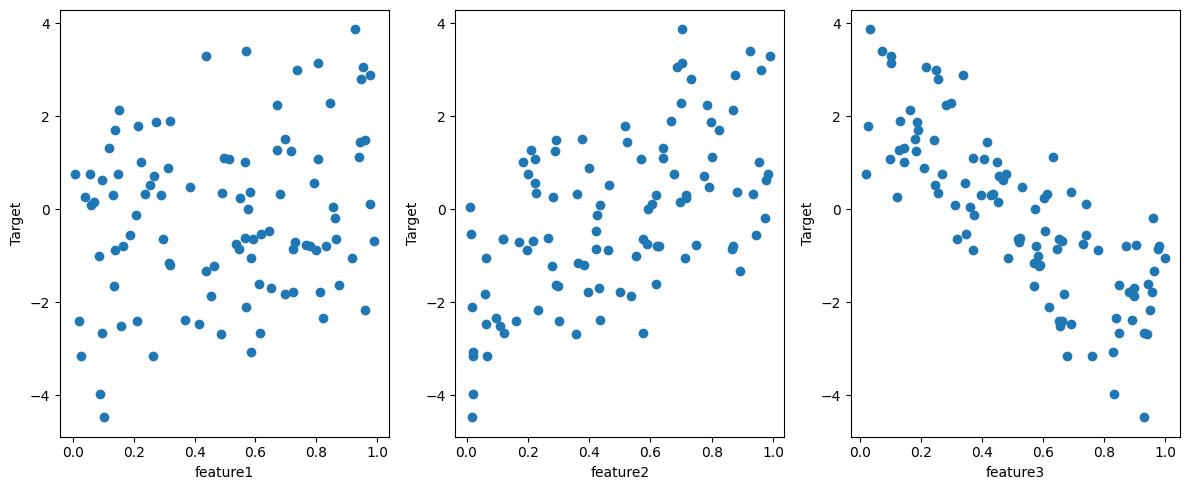

In [154]:
# Генерация синтетических данных
np.random.seed(0)
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] - 5 * X[:, 2] + np.random.randn(100) * 0.1
# Создание DataFrame для анализа данных
data = pd.DataFrame(X, columns=["feature1", "feature2", "feature3"])
data["target"] = y
# Визуализация зависимости каждого признака от целевой переменной
plt.figure(figsize=(12, 5))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(1, 3, i+1)
    plt.scatter(data[feature], data["target"])
    plt.xlabel(feature)
    plt.ylabel("Target")
plt.tight_layout()
plt.show()
# Основные статистические характеристики данных
summary_stats = data.describe()
# Корреляция между признаками и целевой переменной
correlation_matrix = data.corr()
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Создание и обучение дерева решений для регрессии
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
# Прогнозирование целевых значений на тестовом наборе
y_pred = regressor.predict(X_test)
# Оценка качества модели с помощью среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
# Визуализация дерева решений
plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=data.columns[:-1], filled=True)
plt.show()
print("Generated Data:\n", data.head())
print("\nSummary Statistics:\n", summary_stats)
print("\nCorrelation with Target:\n", target_correlations)
print("\nMean Squared Error:", mse)


In [ ]:
data = fetch_california_housing(as_frame=True)
x = data.data
y = data.target
x.head()

In [ ]:
y.head()

In [ ]:
X_train, X_test, y_train, y_test = split_data(input_data = data)
# Создание и обучение дерева решений для регрессии
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
# Прогнозирование целевых значений на тестовом наборе
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

In [ ]:
regressor.feature_importances_

In [ ]:

features = x.columns
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = split_data(load_breast_cancer())
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

pred = model.predict_proba(X_test)[:, 1]


In [ ]:


fpr, tpr, _ = roc_curve(y_test, pred)

plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')


In [ ]:


roc_auc_score(y_test, pred)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 6.5)

# Сгенерируем линейно разделимую выборку.
np.random.seed(13)
n = 500
x = np.zeros(shape=(n, 2))
x[:, 0] = np.linspace(-5, 5, 500)
x[:, 1] = x[:, 0] + 0.5 * np.random.normal(size=n)
y = (x[:, 1] > x[:, 0]).astype(int)
plt.scatter(x[:, 0], x[:, 1], s=100, c=y, cmap="winter")
plt.show()




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=13)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)


In [ ]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, lr)
plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)


In [ ]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

In [ ]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='winter')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)


In [ ]:
plot_decision_regions(X_test, y_test, lr)
plt.show()


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)



In [ ]:
plot_decision_regions(X_test, y_test, dt)
plt.show()


In [ ]:
data = load_iris(as_frame=True)

X = data.data[['sepal length (cm)', 'sepal width (cm)']]
y = data.target

X.head()


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree.get_depth()


10

In [175]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

alphas


array([0.        , 0.00277778, 0.00277778, 0.00277778, 0.00324074,
       0.00518519, 0.00555556, 0.00694444, 0.00743464, 0.01006944,
       0.01041667, 0.01161038, 0.01230159, 0.01581699, 0.02010944,
       0.05683866, 0.06089286, 0.20756944])

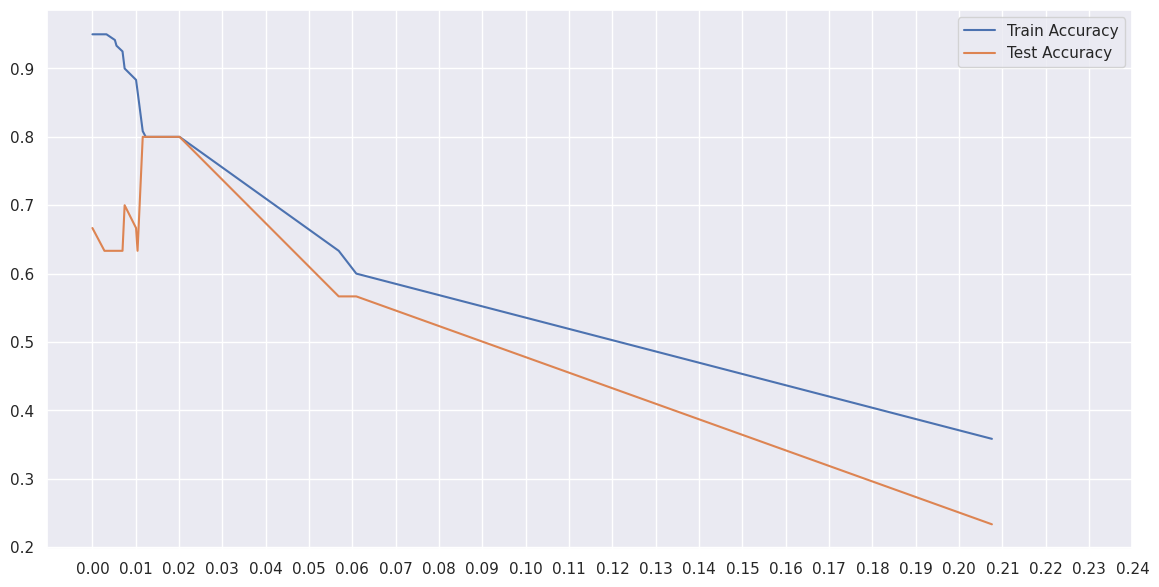

In [176]:
accuracy_train, accuracy_test = [], []

for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i)

    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))

sns.set()
plt.figure(figsize=(14, 7))
sns.lineplot(y=accuracy_train, x=alphas, label="Train Accuracy")
sns.lineplot(y=accuracy_test, x=alphas, label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00, 0.25, 0.01))
plt.show()


In [177]:
tree = DecisionTreeClassifier(ccp_alpha=0.02, random_state=40)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print(accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred))


0.8 0.8
